## **Setup Object Detection API**

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57544, done.
remote: Counting objects: 100% (1607/1607), done.
remote: Compressing objects: 100% (542/542), done.
remote: Total 57544 (delta 1106), reused 1500 (delta 1049), pack-reused 55937
Receiving objects: 100% (57544/57544), 572.97 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (39768/39768), done.


In [21]:
cd /content/models/research

/content/models/research


In [22]:
!protoc object_detection/protos/*.proto --python_out=.

In [23]:
!git clone https://github.com/cocodataset/cocoapi.git

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [24]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [25]:
!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-ind

In [26]:
cp -r pycocotools /content/models/research

In [27]:
cd .. 

/content/models/research/cocoapi


In [28]:
cd .. 

/content/models/research


In [29]:
cp object_detection/packages/tf2/setup.py .

In [30]:
!python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650082 sha256=e06600f28f8897df3e1f200e69fa200862b415db8bb5e176642daa6b0d83701e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yczmvon8/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [31]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2021-05-30 07:46:20.986310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-05-30 07:46:23.435829: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-30 07:46:23.519582: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-30 07:46:23.519666: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (75566d3f2a0f): /proc/driver/nvidia/version does not exist
W0530 07:46:23.808487 140631565449088 model_builder.py:1061] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
I0530 07:46

## **Load Test Images**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
pwd

'/content/models/research'

In [33]:
cd /content/drive/MyDrive/RDD2020

/content/drive/MyDrive/RDD2020


In [45]:
!tar -zxf /content/drive/MyDrive/RDD2020/test1.tar.gz

In [37]:
ls

data/  test1/  test1.tar.gz  train/  train.tar.gz


## **Load Label Map**

In [40]:
from object_detection.utils import label_map_util

PATH_TO_LABELS = '/content/drive/MyDrive/RDD2020/data/label_map.pbtxt'

In [41]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

## **Inference on Images**

In [43]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('/content/drive/MyDrive/Colab_Notebooks/IDDR/exported_models/my_model/pipeline.config')
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore('/content/drive/MyDrive/Colab_Notebooks/IDDR/exported_models/my_model/checkpoint/ckpt-0').expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections



Running inference for /content/drive/MyDrive/RDD2020/test1/Czech/images/Czech_000004.jpg... Done


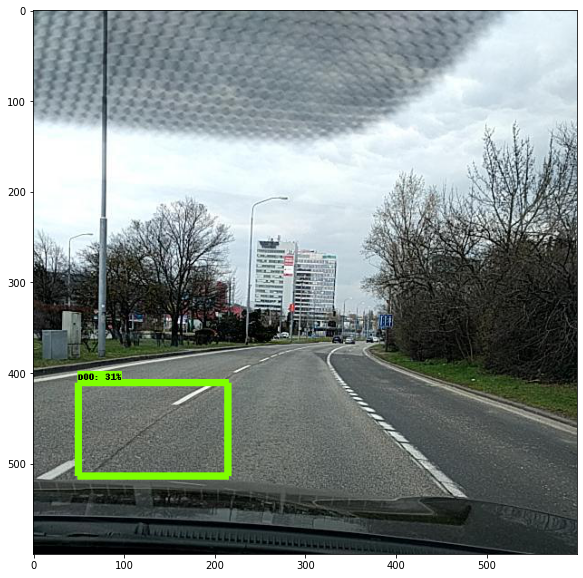

Running inference for /content/drive/MyDrive/RDD2020/test1/Czech/images/Czech_000051.jpg... Done


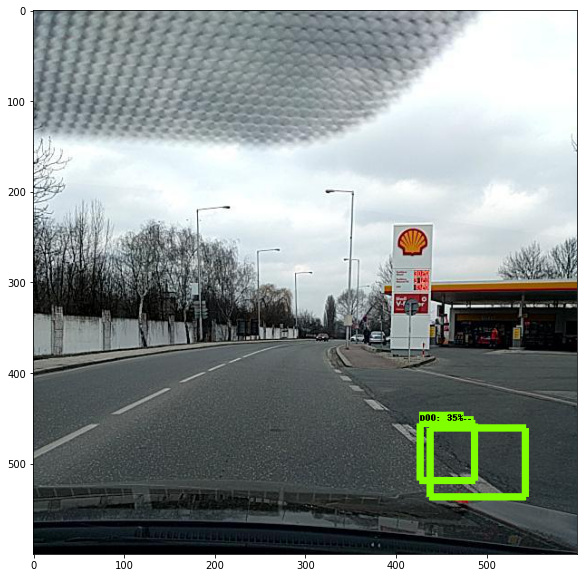

Running inference for /content/drive/MyDrive/RDD2020/test1/India/images/India_000006.jpg... Done


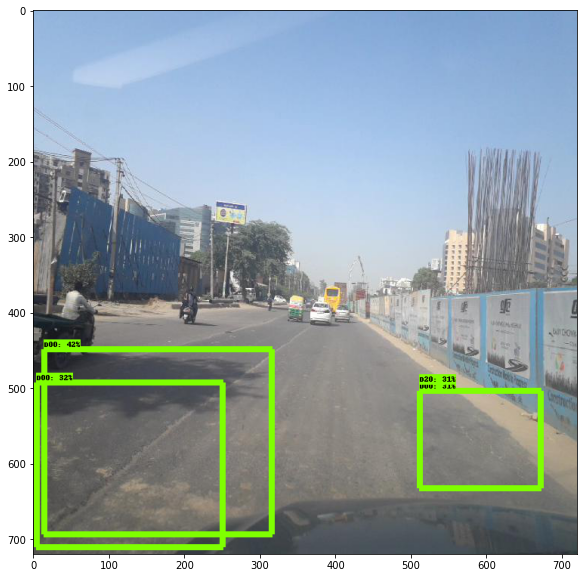

Running inference for /content/drive/MyDrive/RDD2020/test1/India/images/India_000009.jpg... Done


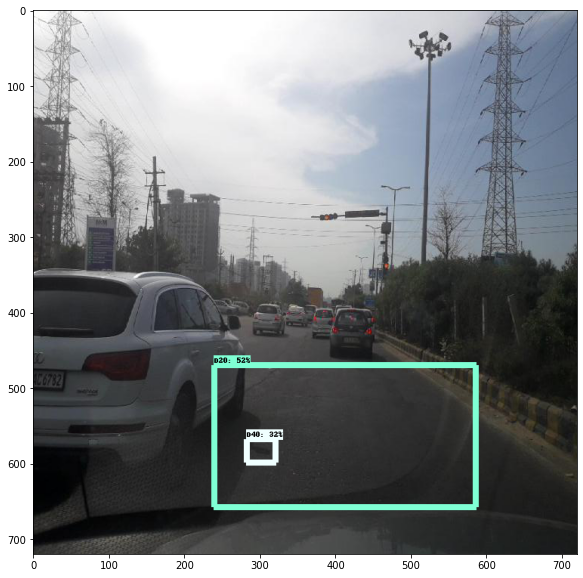

Running inference for /content/drive/MyDrive/RDD2020/test1/Japan/images/Japan_000016.jpg... Done


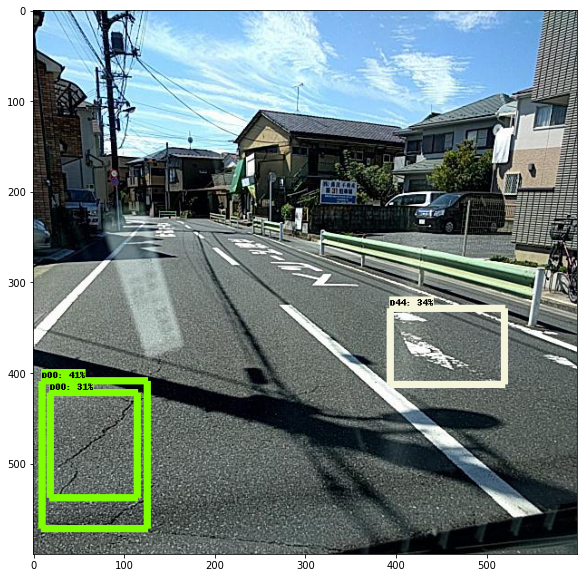

Running inference for /content/drive/MyDrive/RDD2020/test1/Japan/images/Japan_000060.jpg... Done


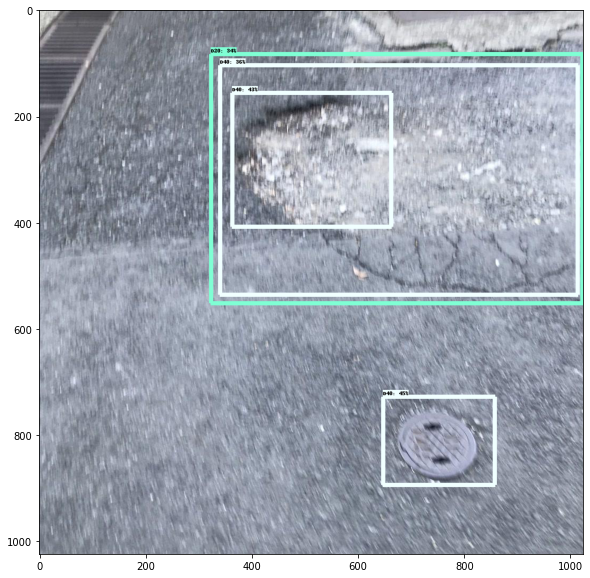

Running inference for /content/perbaikan-jalan-rusak-di-jombang-terkendala-aspal-yang-belum-datang_m_130925.jpg... Done


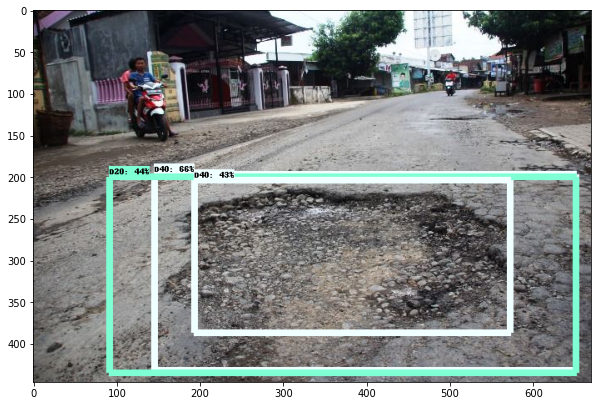

Running inference for /content/Jalan-Rusak.jpeg... Done


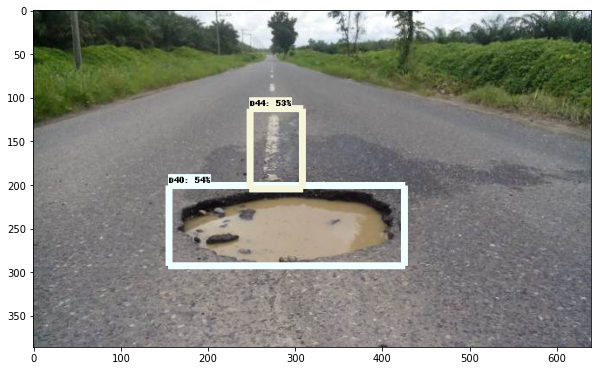

Running inference for /content/jalan-rusak.jpg... Done


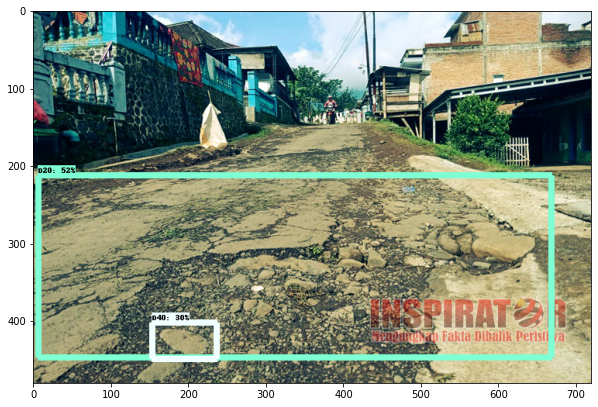

Running inference for /content/images-77.jpeg... Done


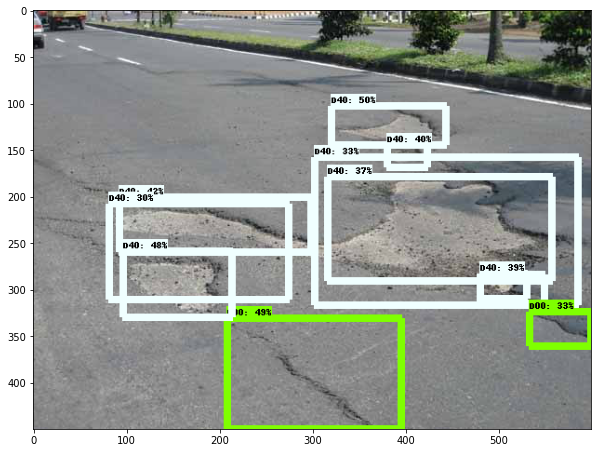

Running inference for /content/jalan-rusak (1).jpg... Done


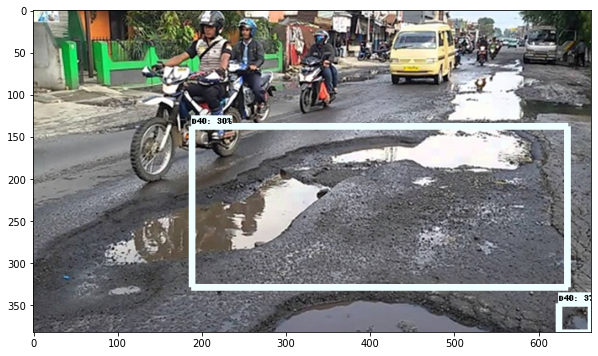

Running inference for /content/WhatsApp Image 2021-05-30 at 15.07.50 (1).jpeg... Done


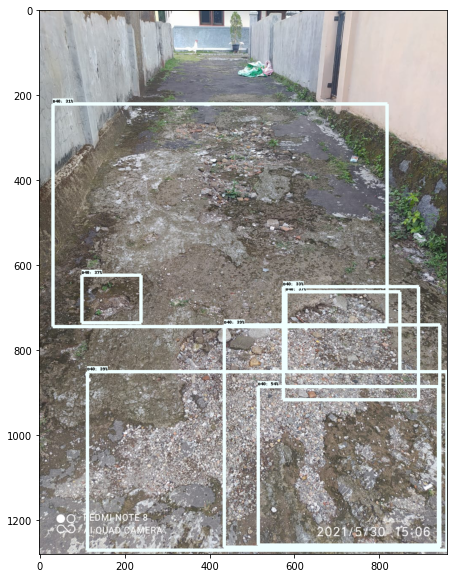

Running inference for /content/2RetakGaris.png... Done


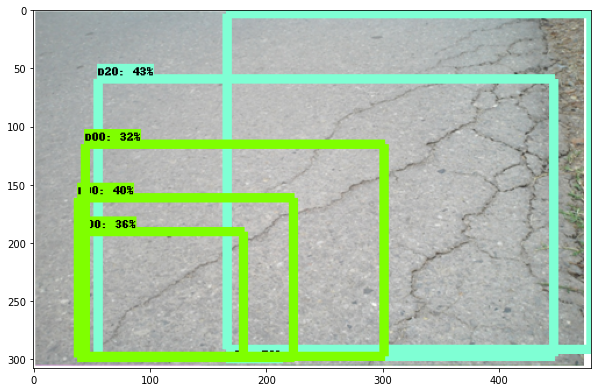

Running inference for /content/40162-Rigid-Road-Pavements.jpg... Done


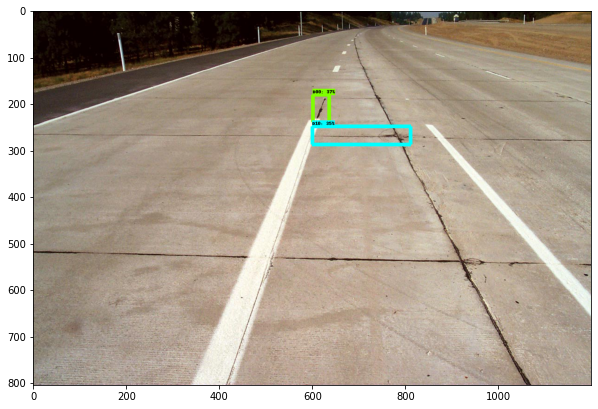

Running inference for /content/unnamed.jpg... Done


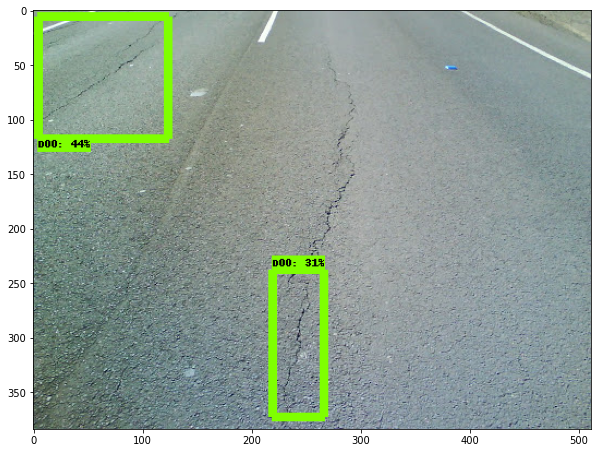

Running inference for /content/WhatsApp Image 2021-05-30 at 15.07.50.jpeg... Done


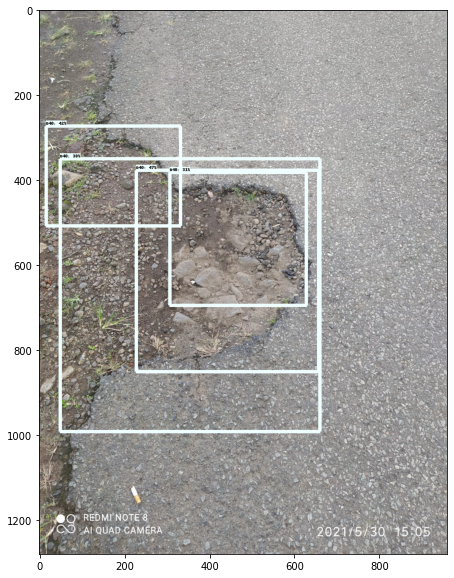

Running inference for /content/retak_buaya.jpg... Done


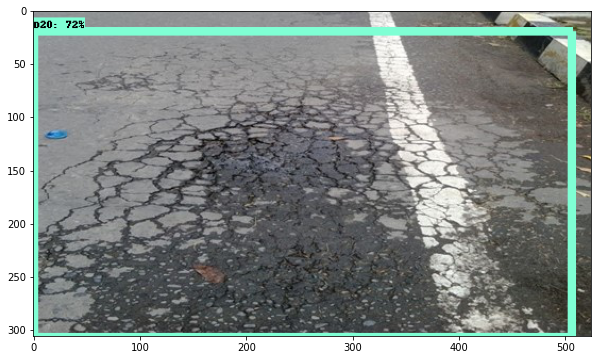

Running inference for /content/images.jpg... Done


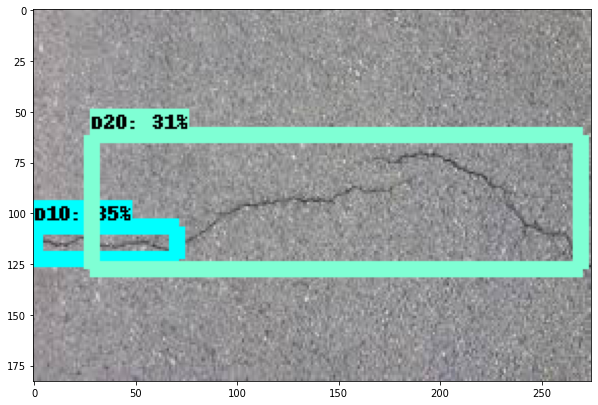

In [72]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

IMAGE_PATHS = ['/content/drive/MyDrive/RDD2020/test1/Czech/images/Czech_000004.jpg',
               '/content/drive/MyDrive/RDD2020/test1/Czech/images/Czech_000051.jpg',
               '/content/drive/MyDrive/RDD2020/test1/India/images/India_000006.jpg',
               '/content/drive/MyDrive/RDD2020/test1/India/images/India_000009.jpg', 
               '/content/drive/MyDrive/RDD2020/test1/Japan/images/Japan_000016.jpg',
               '/content/drive/MyDrive/RDD2020/test1/Japan/images/Japan_000060.jpg',
               '/content/perbaikan-jalan-rusak-di-jombang-terkendala-aspal-yang-belum-datang_m_130925.jpg',
               '/content/Jalan-Rusak.jpeg','/content/jalan-rusak.jpg',
               '/content/images-77.jpeg','/content/jalan-rusak (1).jpg',
               '/content/WhatsApp Image 2021-05-30 at 15.07.50 (1).jpeg',
               '/content/2RetakGaris.png', '/content/40162-Rigid-Road-Pavements.jpg','/content/unnamed.jpg',
               '/content/WhatsApp Image 2021-05-30 at 15.07.50.jpeg',
               '/content/retak_buaya.jpg','/content/images.jpg']

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # #Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False,
            line_thickness=8)

    %matplotlib inline
    fig = plt.figure(figsize = (10,10))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()